In [136]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,10)

# Tutorial 2 Ex 3

In [163]:
l1b, u1b = 0, 2
l2b, u2b = -2, 2


x1 = np.linspace(l1b, u1b, 500)
x2 = np.linspace(l2b, u2b, 500)
X1, X2 = np.meshgrid(x1, x2)

Z = -X2**2
Z[np.abs(X2) >= X1**2] = 2
Z[X1 < 0] = 2

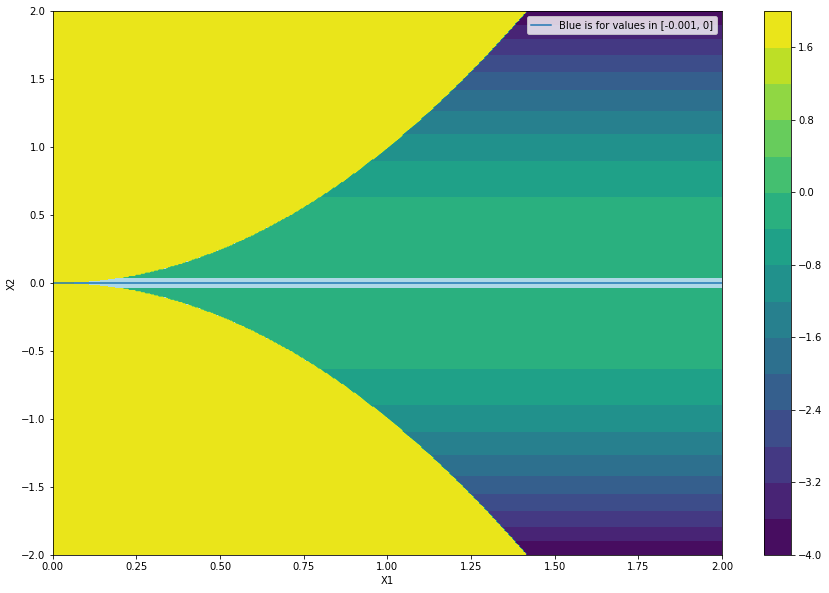

In [180]:
plt.plot([0, 2], [0,0], label="Blue is for values in [-0.001, 0]")
plt.contourf(X1, X2, Z, levels=15)
plt.colorbar()
plt.contourf(X1, X2, Z, levels=[-0.001, 0], colors=["lightblue"])
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()

# Tutorial 3 Ex 4

We consider the function 
$$
f(x) = x^3 - 3 x^2 - 24 x.
$$

The first and second derivatves are given by 
$$
f'(x) = 3 x^2 - 6 x - 24 \\
f''(x) = 6 x - 6.
$$

In [3]:
def f(x):
    return x**3 - 3 * x**2 - 24 * x

def f1(x):
    return 3 * x**2 - 6 * x - 24

def f2(x):
    return 6*x - 6

Let us plot the functions on the interval 

[]

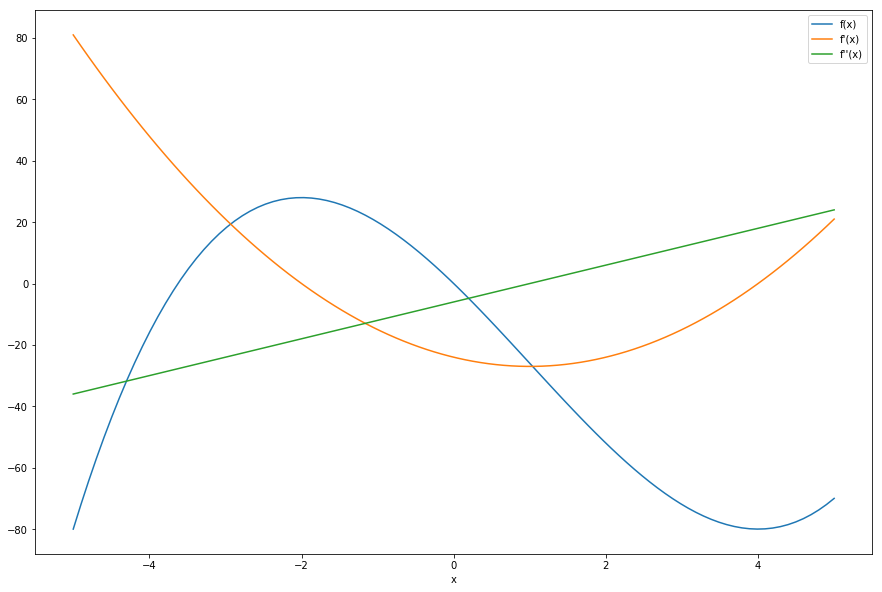

In [14]:
lb, ub = -5, 5
X = np.linspace(lb, ub, 100)

fs = f(X)
f1s = f1(X)
f2s = f2(X)

plt.plot(X, fs, label="f(x)")
plt.plot(X, f1s, label="f'(x)")
plt.plot(X, f2s, label="f''(x)")
plt.xlabel("x")
plt.legend()
plt.plot()


### a) Use the first-order necessary condition and the second-order sufficient condition to find the local minima and local maxima of f(x).

### First order necessary conditions for the interior case (why do we consider the interior case only?)

Let $\Omega$ be a subset of $\mathbb{R}^n$ and $f \in \mathcal{C}^1$ a real valued function on $\Omega$. If $x^*$ is a local minimiser of $f$ over $\Omega$, and $x^*$ is an interior point of $\Omega$ then 
$$
\nabla f(x^*) = 0.
$$


We need to solve 
$$
f'(x) = 3 x^2 - 6 x - 24 = 0
$$
which is a quadratic relation and has solutions at 
$$
x = \frac{6 \pm 18}{6} \rightarrow \{-2, 4\}.
$$

In [15]:
# Verify graphically

[]

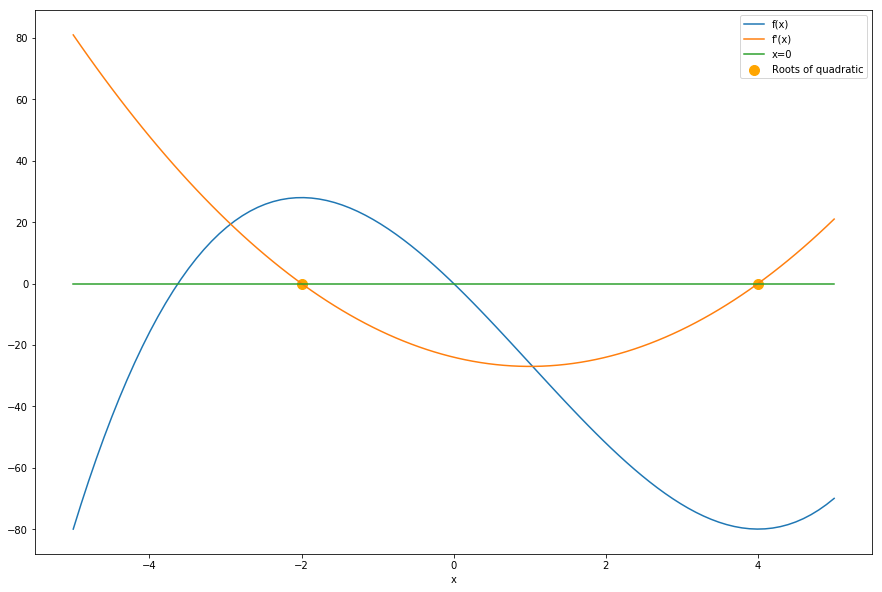

In [27]:
lb, ub = -5, 5
X = np.linspace(lb, ub, 100)

fs = f(X)
f1s = f1(X)
f2s = f2(X)

plt.plot(X, fs, label="f(x)")
plt.plot(X, f1s, label="f'(x)")
plt.scatter([(6 + 18)/6., (6 - 18)/6.], [0, 0], c="orange", s=100, label="Roots of quadratic")
plt.xlabel("x")
plt.plot(X, [0 for _ in X], label="x=0")
plt.legend()
plt.plot()



### Second Order Sufficient Condition (Interior Case)

Suppose that $f \in \mathcal{C}^2$ in a region where $x^*$ is an interior point. Suppose that, 

1) $\nabla f(x^*) = 0$

2) $\nabla^2 f(x^*) \succ 0$, i.e. the Hessian is positive definite at the point $x^*$. 

Then $x^*$ is a strict local minimiser of $f$. 

For this, we need to check the second derivative at the candidate solutions which gives us
$$
f''(4) = 6 * 4 - 6 = 18 > 0 \\
f''(-2) = 6 * -2 - 6 = -18 < 0.
$$

In [28]:
# Check graphically

[]

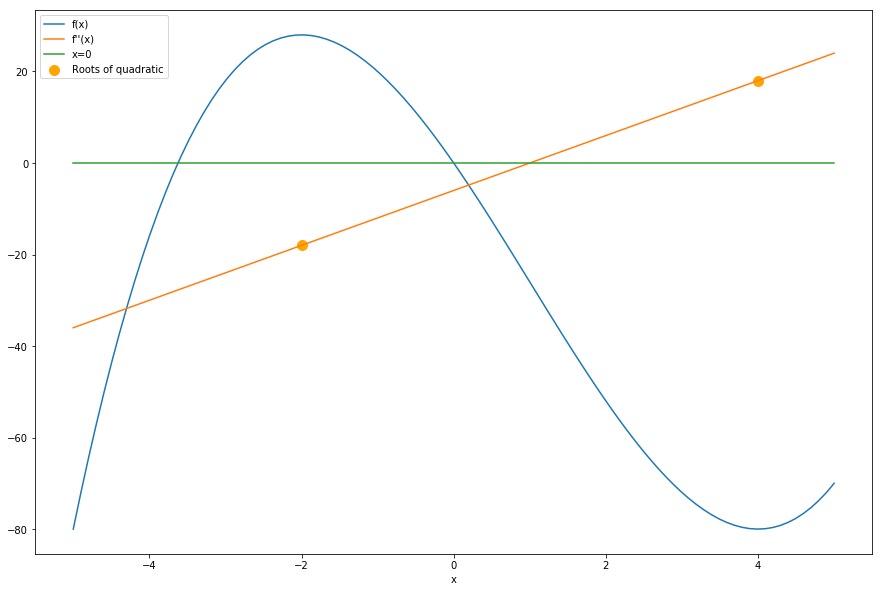

In [31]:
lb, ub = -5, 5
X = np.linspace(lb, ub, 100)

fs = f(X)
f1s = f1(X)
f2s = f2(X)

plt.plot(X, fs, label="f(x)")
plt.plot(X, f2s, label="f''(x)")
plt.scatter([(6 + 18)/6., (6 - 18)/6.], [18, -18], c="orange", s=100, label="Roots of quadratic")
plt.xlabel("x")
plt.plot(X, [0 for _ in X], label="x=0")
plt.legend()
plt.plot()




## (b) Use the first- and second-derivatives to show that $f(x)$ has neither a global maximum nor a global minimum.

## This makes intuitive sense if we plot the function again on a larger interval. 

[]

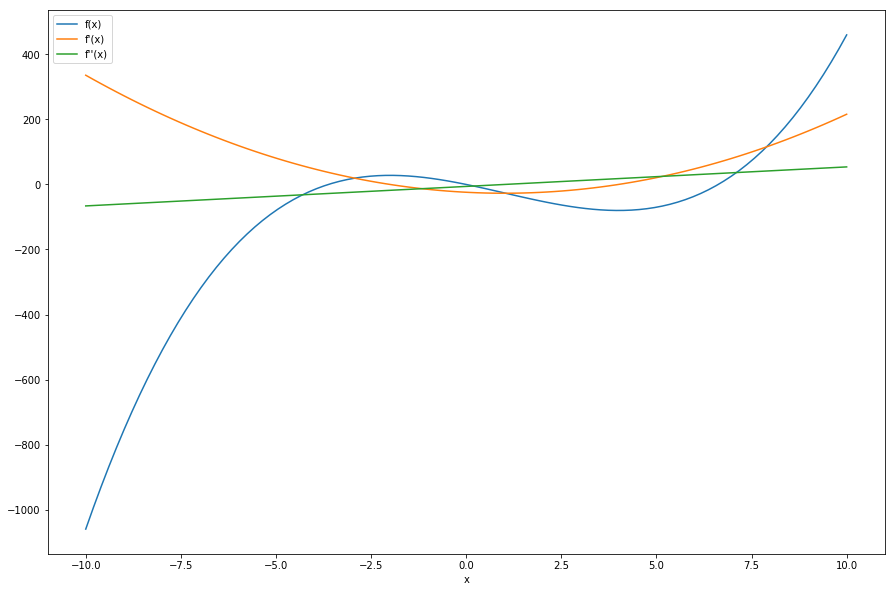

In [32]:
lb, ub = -10, 10
X = np.linspace(lb, ub, 100)

fs = f(X)
f1s = f1(X)
f2s = f2(X)

plt.plot(X, fs, label="f(x)")
plt.plot(X, f1s, label="f'(x)")
plt.plot(X, f2s, label="f''(x)")
plt.xlabel("x")
plt.legend()
plt.plot()



### The function, given by the blue curve, will go to positive infinity when $x$ increases and to negative infinity when $x$ decreases. We now want to prove this. There are many ways to do this, but we will directly use the first and second derivatives. 

1) We want to show that $\lim_{x \rightarrow \infty} f(x) = \infty$. 
For this, notice that
$$f'(5) = 21 > 0.$$ 

Furthermore, notice that for all $y > x$ we have that 
$$
f''(y) > f''(x)
$$
since 
$$
6y - 6 > 6x - 6 \\
y > x
$$
which was true by assumption. 

Hence, we have that the first derivative will indefinitely increase from $x = 5$ onwards. A positive first derivative means that locally, with an increasing $x$ the function will increase locally. Since this is true for the whole interval $[5, \infty)$, we know the function will increase indefinitely and hence never reach a global maximum. 

# Second Part

a) By definition of directional derivative. Expand in some basis and you are done. 

b) No. We will look at a counter example next. 

However, notice the following interesting fact. The Hessian is given by 
$$
\nabla^2 f(x) = \begin{bmatrix}
0 & 0 \\
0 & 2
\end{bmatrix}.
$$

The function is only positive-**semi**definite. Hence, does not satisfy second order sufficient conditions. 

### We plot the function normally, but are unable to observe anything yet. 

In [131]:
import plotly.graph_objects as go

def g(x1, x2):
    return (x2 - x1**2)*(x2 - 2 * x1**2)

xlb, xub = -1, 1
ylb, yub = -2, 2


In [134]:
X = np.linspace(xlb, xub, 50)
Y = np.linspace(ylb, yub, 50)
X1, X2 = np.meshgrid(X, Y)
X1_inp, X2_inp = X1.flatten(), X2.flatten()
Z = g(X1_inp, X2_inp).reshape(len(X), len(X))

fig = go.Figure(data=[go.Surface(x=X1, y=X2, z=Z)])


fig.show()

Text(0, 0.5, 'X2')

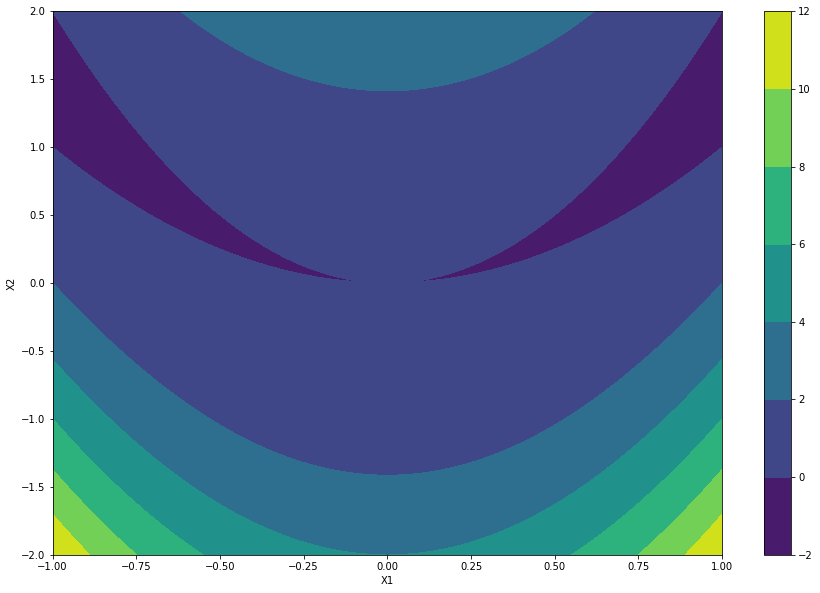

In [135]:
X = np.linspace(xlb, xub, 500)
Y = np.linspace(ylb, yub, 500)
X1, X2 = np.meshgrid(X, Y)
X1_inp, X2_inp = X1.flatten(), X2.flatten()
Z = g(X1_inp, X2_inp).reshape(len(X), len(X))

plt.contourf(X1, X2, Z)
plt.colorbar()
plt.xlabel("X1")
plt.ylabel("X2")

## Take the hint from part d)
A point is a local minimum iff it is a local minimum under any reparametrization. (There is more naunce here, since at $(0, 0)$ there does not exist an inverse of the reparametrization we chose, but that is actually okay, since the reparametrization which is defined on the domain with $(0, 0)$ is valid).

Choose the reparamtrization $x1 = y$ and $x2 = my^2$ which gives

$$
f(y, my^2) = y^4 (m - 1) (m - 2).
$$

Note, that it suffices to let $y\rightarrow 0$ to approach $(0, 0)$. So, all points $(0, m)$ for $m \in \mathbb{R}$ are equal to $(0, 0)$. 

In [123]:
def g(y, m):
    return y**4 * (m - 1) * (m - 2)
    
xlb, xub = -1, 1
ylb, yub = -2, 2

X = np.linspace(xlb, xub, 50)
Y = np.linspace(ylb, yub, 50)
X1, X2 = np.meshgrid(X, Y)
X1_inp, X2_inp = X1.flatten(), X2.flatten()
Z = g(X1_inp, X2_inp).reshape(len(X), len(X))

In [124]:
fig = go.Figure(data=[go.Surface(x=X1, y=X2, z=Z)])

fig.show()

Text(0, 0.5, 'M')

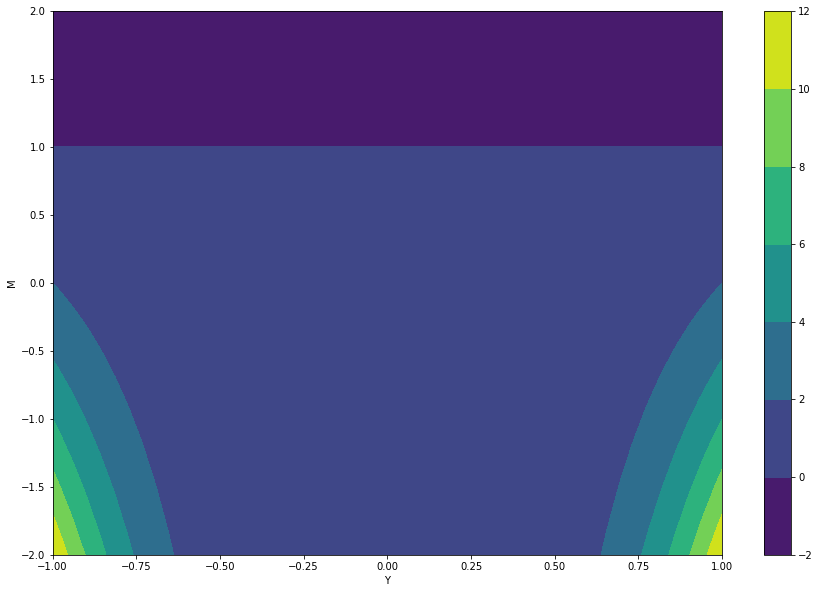

In [125]:
plt.contourf(X1, X2, Z)
plt.colorbar()
plt.xlabel("Y")
plt.ylabel("M")

### We now look at how the domain was transformed.

Essentially, the contour plot in the $x1, x2$ space is a better image of the first contourplot we made where the dark blue line didn't fully extend to $(0, 0)$. 


In [126]:
xlb, xub = -1, 1
ylb, yub = -2, 2

Y = np.linspace(xlb, xub, 50)
M = np.linspace(ylb, yub, 50)
Y_inp, M_inp = np.meshgrid(Y, M)
# Z = Y_inp**2 + M_inp**2
Z = g(Y_inp, M_inp)#.reshape(len(y), len())


X1 = Y_inp
X2 = M_inp * Y_inp**2

Text(0, 0.5, 'M')

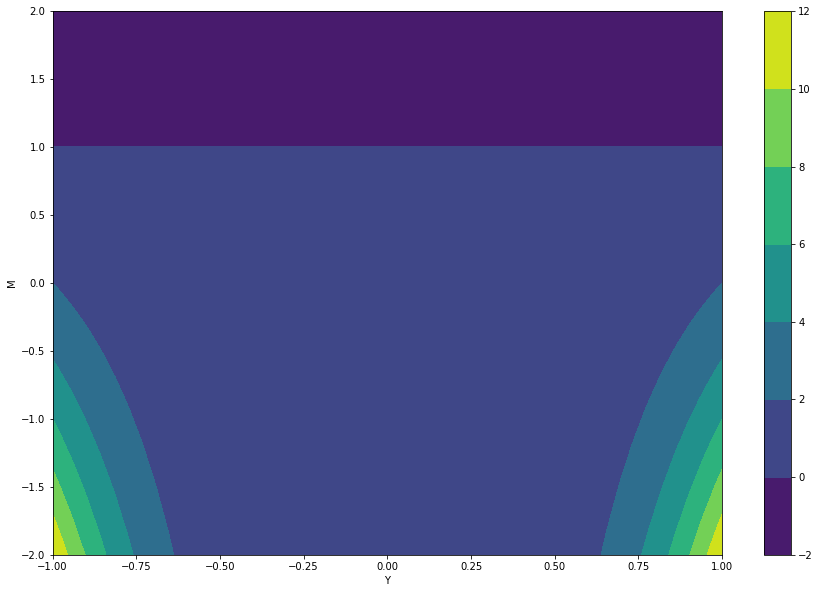

In [127]:
plt.contourf(Y_inp, M_inp, Z)
plt.colorbar()
plt.xlabel("Y")
plt.ylabel("M")

Text(0, 0.5, 'X2')

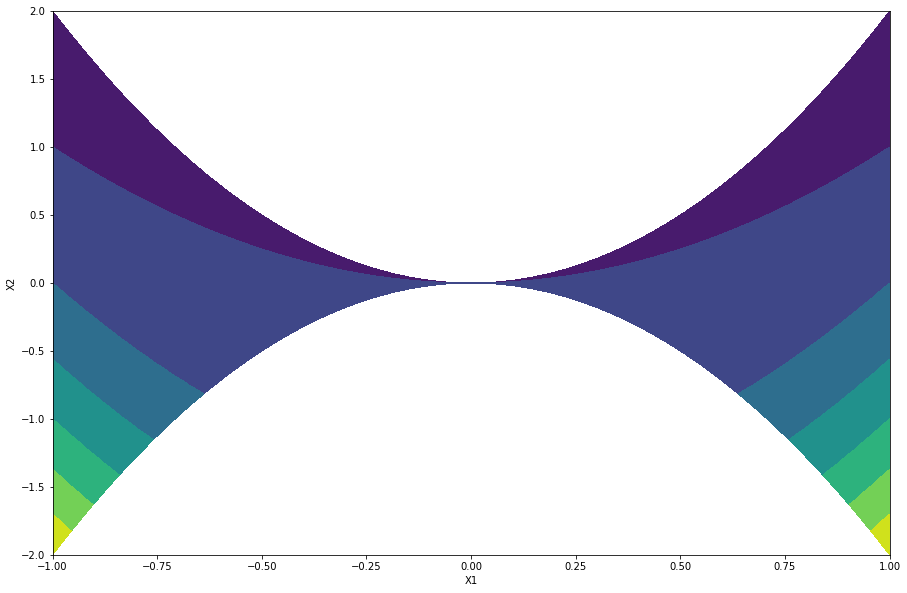

In [128]:
plt.contourf(X1, X2, Z)
plt.xlabel("X1")
plt.ylabel("X2")